In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
dataframe = pd.read_csv ('spg.csv')

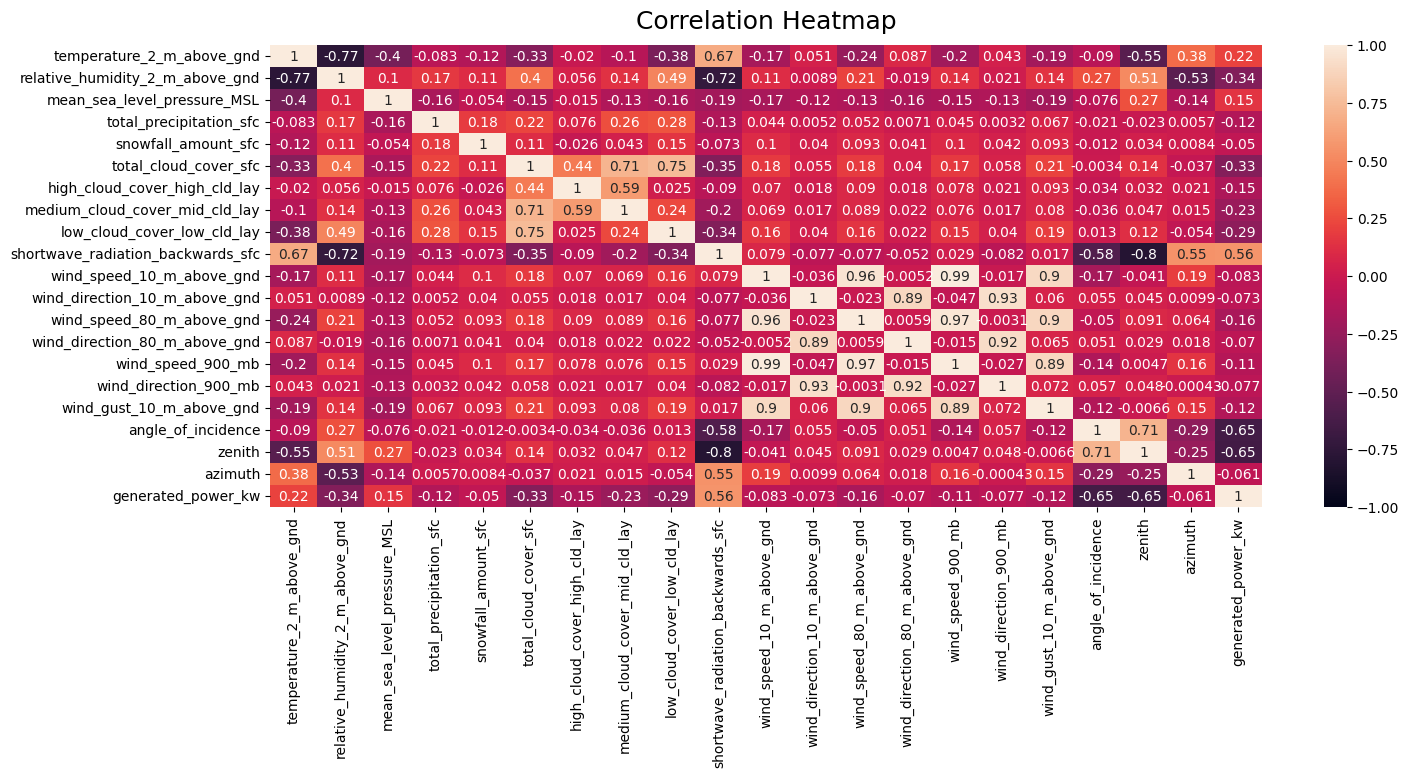

In [3]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


<ipython-input-4-5365ce1266af>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))


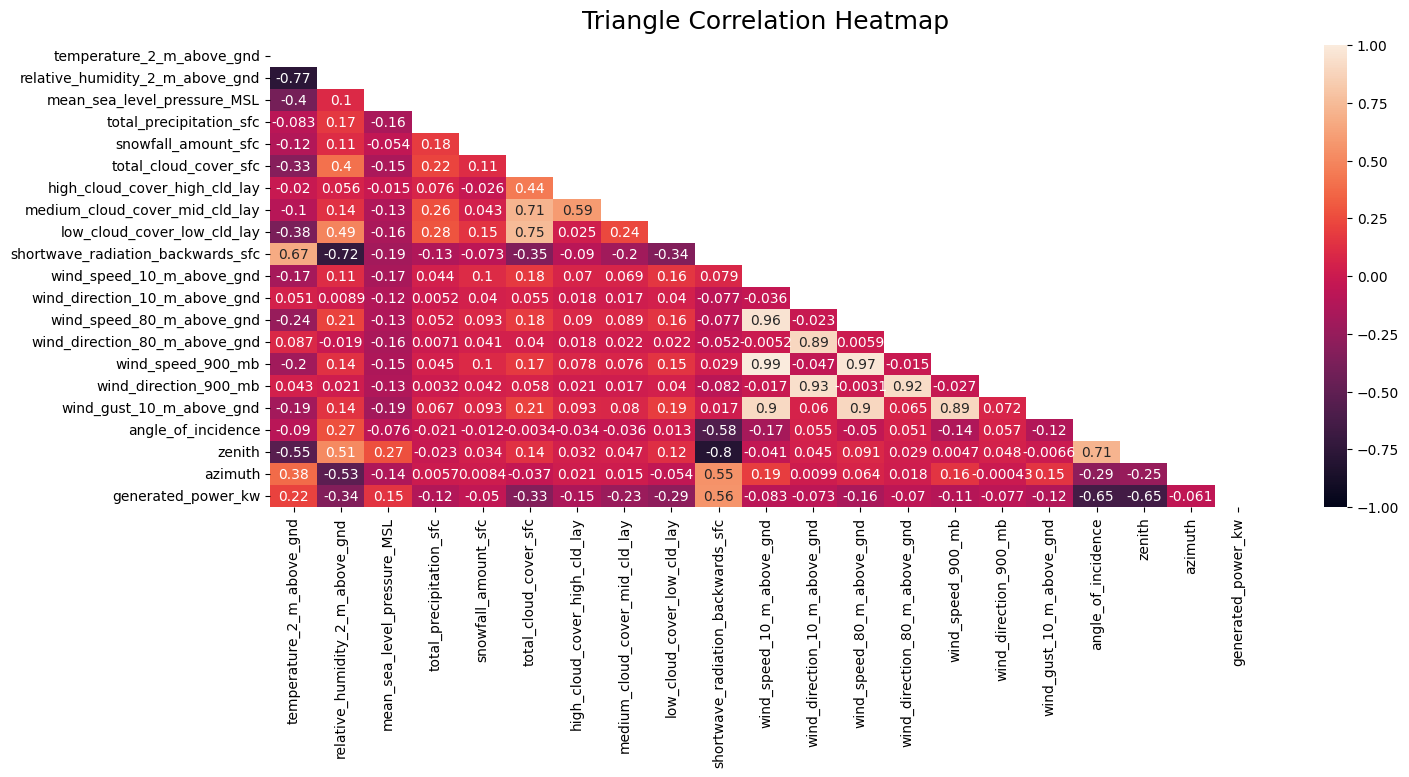

In [4]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

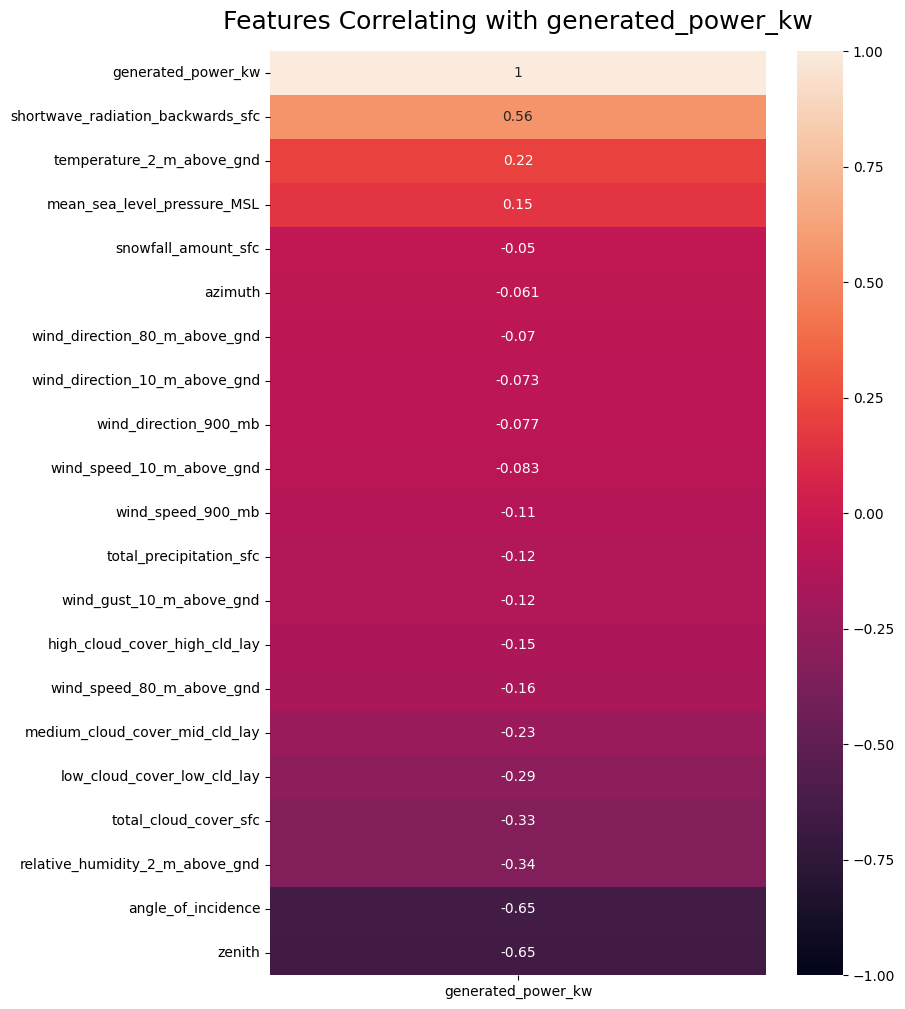

In [5]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataframe.corr()[['generated_power_kw']].sort_values(by='generated_power_kw', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with generated_power_kw', fontdict={'fontsize':18}, pad=16);

**Random Forest Regressor:**

**Strengths:** Handles non-linear relationships well, less likely to overfit than some other models, and is robust to outliers.

**Usage:** Especially effective if the relationships in your data are complex and not easily captured by a linear model.

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = dataframe.drop('generated_power_kw', axis=1)
y = dataframe['generated_power_kw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


Mean Squared Error (MSE): 166252.43916617727
Mean Absolute Error (MAE): 255.60428237061896
Root Mean Squared Error (RMSE): 407.7406518440089
R-squared (R²) Score: 0.8179977737567237


**Applying Gradient Boosting Regressor**

**Strengths:** Often provides high predictive accuracy, handles a mix of categorical and numerical features well, and can capture complex non-linear relationships.

**Usage:** Useful if you require a model thất can capture complex patterns in the data. Gradient boosting can be more sensitive to overfitting and requires careful tuning of parameters.

In [7]:
X = dataframe.drop('generated_power_kw', axis=1)
y = dataframe['generated_power_kw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R-squared (R²) Score: {r2_gb}")


Mean Squared Error (MSE): 180797.22558519602
Mean Absolute Error (MAE): 286.89391731993425
Root Mean Squared Error (RMSE): 425.2025700594906
R-squared (R²) Score: 0.8020750990472814
